# Example: van Keken

The set of simulations proposed by van Keken et al. (1997) compares several methods of studying two dimensional thermochemical convection, where the Boussinesq approximation and infinite Prandtl number are used.

The simulation consists of two layers, where a buoyant thin layer is under a denser thicker package.

## Generate input files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Shape of the model

In [2]:
# Model extension in meters
Lx, Lz = 91.42 * 1e3, 100e3

# Number of nodes
Nx, Nz = 81, 81

In [3]:
xn = np.linspace(0, Lx, Nx)

### Create the interface

The model has two layers. 
So, create the interface between the layers:

In [4]:
liton = -0.8 * Lz + 0.02 * Lz * np.cos(np.pi * xn / Lx)

Plot the interface:

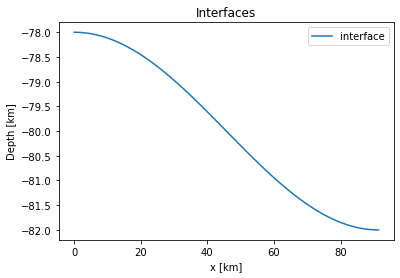

In [5]:
fig = plt.figure()
plt.plot(xn / 1e3, liton / 1e3 , label="interface")

plt.xlabel("x [km]")
plt.ylabel("Depth [km]")

plt.title("Interfaces")
plt.legend()

plt.show()

### Create the interface file

The interface file contain the layer properties and the interface's depth between these layers.

Layer properties:

* Compositional factor (C)
* Density (rho)
* Radiogenic heat (H)
* Pre-exponential scale factor (A)
* Power law exponent (n)
* Activation energy (Q)
* Activation volume (v)

In this case, generate two interfaces with different density (`rho`).


In [6]:
layer_properties = [
    "C    1.0     1.0",
    "rho -1000.   0.",
    "H    0.0e-12 0.0e-12",
    "A    0.0     0.0",
    "n    0.0     0.0",
    "Q    0.0     0.0",
    "V    0.0     0.0",
]

with open("interfaces.txt", "w") as f:
    for line in layer_properties:
        line = line.strip()
        if len(line):
            f.write(" ".join(line.split()) + "\n")

    for line in np.arange(Nx):
        f.write("%lf\n" % (liton[line]))

### Parameters file

In [7]:
params = f"""
# Geometry
nx                                  = {Nx}          # N. of elements in the longitudinal direction
nz                                  = {Nz}          # N. of elements in the vertical direction
lx                                  = {Lx}          # Extent in the longitudinal direction
lz                                  = {Lz}          # Extent in the vertical direction
particles_per_element_x             = 0             # default is 0
particles_per_element_z             = 0             # default is 0

# Simulation options
multigrid                           = 1             # ok -> soon to be on the command line only
solver                              = direct        # default is direct [direct/iterative]
denok                               = 1.0e-15       # default is 1.0e-4
particles_per_element               = 1100          # default is 81
particles_perturb_factor            = 0.0           # default is 0.5 [values are between 0 and 1]
rtol                                = 1.0e-5        # the absolute size of the residual norm (relevant only for iterative methods), default is 1.0E-5
RK4                                 = Euler         # default is Euler [Euler/Runge-Kutta]
Xi_min                              = 1.0e-14       # default is 1.0e-14
random_initial_strain               = 0.0           # default is 0.0
pressure_const                      = -1.0          # default is -1.0 (not used)
initial_dynamic_range               = False         # default is False [True/False]
periodic_boundary                   = False         # default is False [True/False]
high_kappa_in_asthenosphere         = False         # default is False [True/False]
K_fluvial                           = 2.0e-7        # default is 2.0e-7
m_fluvial                           = 1.0           # default is 1.0
sea_level                           = 0.0           # default is 0.0
basal_heat                          = -1.0          # default is -1.0

# Surface processes
sp_surface_tracking                 = False         # default is False [True/False]
sp_surface_processes                = False         # default is False [True/False]
sp_dt                               = 0             # default is 0
sp_d_c                              = 0             # default is 0
plot_sediment                       = False         # default is False [True/False]
a2l                                 = True          # default is True [True/False]

free_surface_stab                   = True          # default is True [True/False]
theta_FSSA                          = 0.5           # default is 0.5 (only relevant when free_surface_stab = True)

# Time constrains
step_max                            = 4000          # Maximum time-step of the simulation
time_max                            = 140000.0e6    # Maximum time of the simulation [s]
dt_max                              = 1000.0e6      # Maximum time between steps of the simulation [s]
step_print                          = 20            # Make file every <step_print>
sub_division_time_step              = 1.0           # default is 1.0
initial_print_step                  = 0             # default is 0
initial_print_max_time              = 1.0e6         # default is 1.0e6 [years]

# Viscosity
viscosity_reference                 = 1.0e21        # Reference viscosity [Pa.s]
viscosity_max                       = 1.0e25        # Maximum viscosity [Pa.s]
viscosity_min                       = 1.0e17        # Minimum viscosity [Pa.s]
viscosity_per_element               = constant      # default is variable [constant/variable]
viscosity_mean_method               = harmonic      # default is harmonic [harmonic/arithmetic]
viscosity_dependence                = pressure      # default is depth [pressure/depth]

# External ASCII inputs/outputs
interfaces_from_ascii               = True          # default is False [True/False]
n_interfaces                        = 1             # Number of interfaces int the interfaces.txt file
variable_bcv                        = False         # default is False [True/False]
temperature_from_ascii              = False         # default is False [True/False]
velocity_from_ascii                 = False         # default is False [True/False]
binary_output                       = False         # default is False [True/False]
sticky_blanket_air                  = False         # default is False [True/False]
precipitation_profile_from_ascii    = False         # default is False [True/False]
climate_change_from_ascii           = False         # default is False [True/False]


print_step_files                    = True          # default is True [True/False]
checkered                           = False         # Print one element in the print_step_filesdefault is False [True/False]

sp_mode                             = 1             # default is 1 [0/1/2]

geoq                                = on            # ok
geoq_fac                            = 1.0           # ok

# Physical parameters
temperature_difference              = 0.            # ok
thermal_expansion_coefficient       = 3.28e-5       # ok
thermal_diffusivity_coefficient     = 1.0e-6        # ok
gravity_acceleration                = 10.0          # ok
density_mantle                      = 3300.         # ok
external_heat                       = 0.0e-12       # ok
heat_capacity                       = 1250.         # ok

non_linear_method                   = off           # ok
adiabatic_component                 = off           # ok
radiogenic_component                = off           # ok

# Velocity boundary conditions
top_normal_velocity                 = fixed         # ok
top_tangential_velocity             = fixed         # ok
bot_normal_velocity                 = fixed         # ok
bot_tangential_velocity             = fixed         # ok
left_normal_velocity                = fixed         # ok
left_tangential_velocity            = free          # ok
right_normal_velocity               = fixed         # ok
right_tangential_velocity           = free          # ok

surface_velocity                    = 0.0e-2        # ok
multi_velocity                      = False         # default is False [True/False]

# Temperature boundary conditions
top_temperature                     = fixed         # ok
bot_temperature                     = fixed         # ok
left_temperature                    = free          # ok
right_temperature                   = free          # ok

rheology_model                      = 0             # ok
T_initial                           = 0             # ok
"""

# Create the parameter file
with open("param.txt", "w") as f:
    for line in params.split("\n"):
        f.write(line + "\n")

## Run the model

You can run the model as:

```
mpirun -n NUMBER_OF_CORES mandyoc
```

You have to change NUMBER_OF_CORES.

## Post-processing

### Plot the results

Determine the initial and final step to make the plots:

In [8]:
step_initial = 0
step_final = 2000
d_step = 400

Load the parameter file to generate the grid of the model:

In [9]:
with open("param.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    line = f.readline()
    line = line.split()
    Nx = int(line[2])
    line = f.readline()
    line = line.split()
    Nz = int(line[2])
    line = f.readline()
    line = line.split()
    Lx = float(line[2])
    line = f.readline()
    line = line.split()
    Lz = float(line[2])

print(
    "nx:", Nx, "\n",
    "nz:", Nz, "\n",
    "Lx:", Lx, "\n",
    "Lz:", Lz
)

nx: 81 
 nz: 81 
 Lx: 91420.0 
 Lz: 100000.0


0
Step = 0
Time = 0.0 Myr


rho_min: -1000.0 rho_max: 0.0


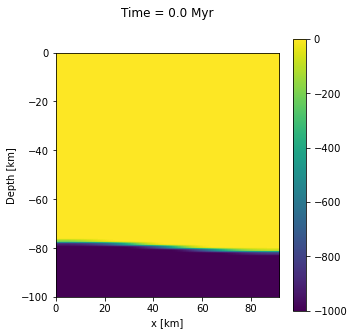

400
Step = 400
Time = 5.7 Myr


rho_min: -1000.0 rho_max: 0.0


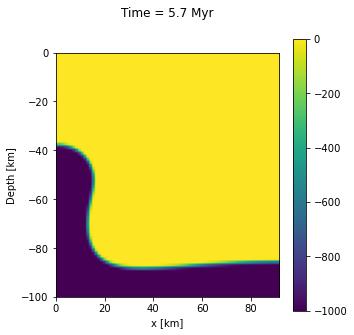

800
Step = 800
Time = 7.3 Myr


rho_min: -1000.0 rho_max: 0.0


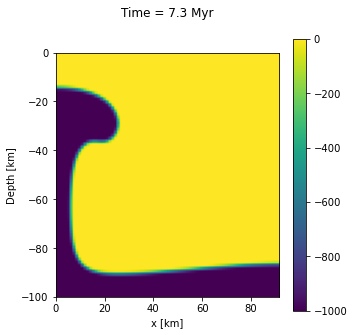

1200
Step = 1200
Time = 9.5 Myr


rho_min: -1000.0 rho_max: 0.0


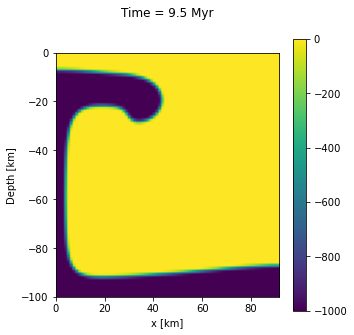

1600
Step = 1600
Time = 13.1 Myr


rho_min: -1000.0 rho_max: 0.0


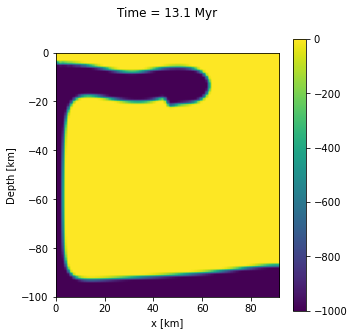

2000
Step = 2000
Time = 18.9 Myr


rho_min: -1000.0 rho_max: 0.0


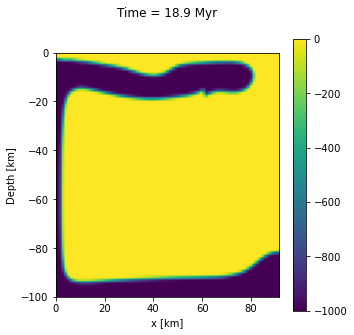

In [10]:
for cont in range(step_initial, step_final + d_step, d_step):
    print(cont)
    
    # Read time
    time = np.loadtxt("time_" + str(cont) + ".txt", dtype="str")
    time = time[:, 2:]
    time = time.astype("float")
    
    # Read density
    density = np.loadtxt(
        "density_" + str(cont) + ".txt", 
        unpack=True, 
        comments="P", 
        skiprows=2
    )
    density[np.abs(density) < 1.0e-200] = 0
    density = np.reshape(density, (Nx, Nz), order="F")
    
    print("Step =", cont)
    print("Time = %.1lf Myr\n\n" % (time[0] / 1.0e6))
    print("rho_min:", density.min(), "rho_max:", density.max())
    
    
    plt.figure(figsize=(5, 5))
    plt.title("Time = %.1lf Myr\n\n" % (time[0] / 1.0e6))
    
    plt.imshow(
        np.transpose(density[:, ::-1]), 
        extent=[0, Lx / 1e3, -Lz / 1e3 , 0],
    )
    
    plt.xlabel("x [km]")
    plt.ylabel("Depth [km]")
    plt.gca().set_aspect("equal")
    plt.colorbar()
    
    plt.show()